In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def compute_corr_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    corr_X_Z = pd.concat([df_X, df_Z], axis=1).corr().iloc[:K_X, K_X:]
    return pd.DataFrame(
        corr_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )

In [ ]:
# The GDRIVE_PATH variable tells Google Colab "how to connect"
GDRIVE_PATH = '/content/gdrive' # do not change this GDRIVE_PATH variable!

from google.colab import drive
drive.mount(GDRIVE_PATH)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Make sure that MY_COLAB_FOLDER points to the folder with the Ads Model.csv file
MY_COLAB_FOLDER = 'My Drive/BUMK_744_ANALYSIS/'
DATA_FOLDER = GDRIVE_PATH + '/' + MY_COLAB_FOLDER # this line creates the path
print(DATA_FOLDER)

/content/gdrive/My Drive/BUMK_744_ANALYSIS/


In [ ]:
X = pd.read_csv(
    DATA_FOLDER + 'Ads Model.csv',
)

In [ ]:
X.columns

Index(['Keyword', 'CTR', 'Click share', 'Search top IS', 'Avg.cost',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [ ]:
X["CTR"] = X["CTR"] - X["CTR"].mean()


In [ ]:
X["Click share"] = X["Click share"] - X["Click share"].mean()

In [ ]:
X["Search top IS"] = X["Search top IS"] - X["Search top IS"].mean()

In [ ]:
X["Avg.cost"] = X["Avg.cost"] - X["Avg.cost"].mean()
X["Avg.cost"] = X["Avg.cost"] / X["Avg.cost"].std()

In [ ]:
X.head()
X = X.drop(['Keyword'], axis=1)

In [ ]:
X.head()

,CTR,Click share,Search top IS,Avg.cost
0,0.017767,0.211523,0.31341,-1.256442
1,-0.006533,0.207323,0.22341,-0.677979
2,0.092867,0.350223,0.42991,2.301598
3,-0.006733,0.087423,0.20161,0.547579
4,0.031267,0.112323,0.13691,1.338800


In [ ]:
from sklearn.cluster import KMeans # Notice the capitalization!

In [ ]:
kmeans = KMeans(random_state=744)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=744, tol=0.0001, verbose=0)

In [ ]:
X.index.is_unique

True

In [ ]:
M = kmeans.cluster_centers_
M = pd.DataFrame(M, index=np.arange(kmeans.n_clusters) + 1)
M.round(2)

,0,1,2,3
1,0.01,-0.02,-0.04,-0.24
2,-0.01,-0.04,0.00,0.49
3,-0.02,-0.16,-0.16,2.65
4,-0.01,-0.09,-0.13,-0.84
5,0.02,0.04,0.07,1.21
6,0.09,0.35,0.43,2.30
7,-0.01,0.06,0.10,-1.26
8,-0.02,0.15,0.08,-0.58


In [ ]:
M = M.rename(columns={0: "CTR", 1: "Click share", 2: "Search top IS", 3: "Avg.cost"})

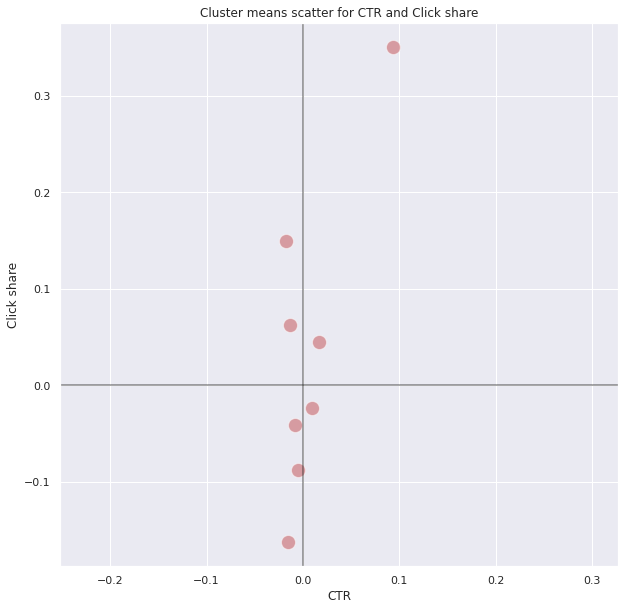

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'CTR'
y_var = 'Click share'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


plt.axis('equal')
plt.show()

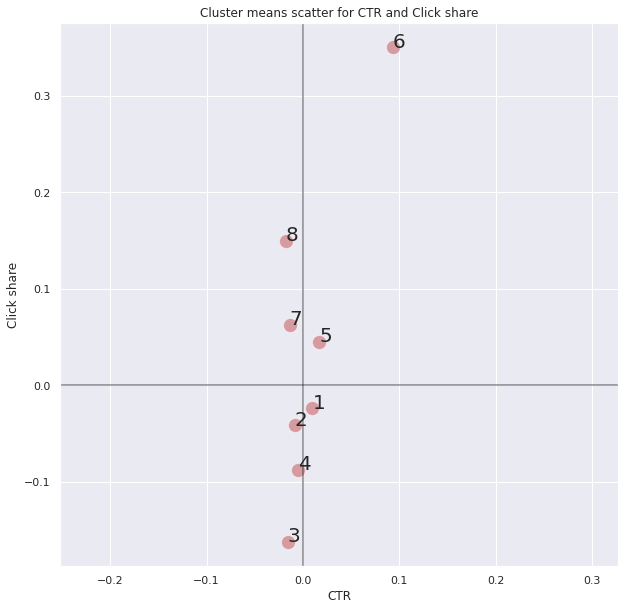

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'CTR'
y_var = 'Click share'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

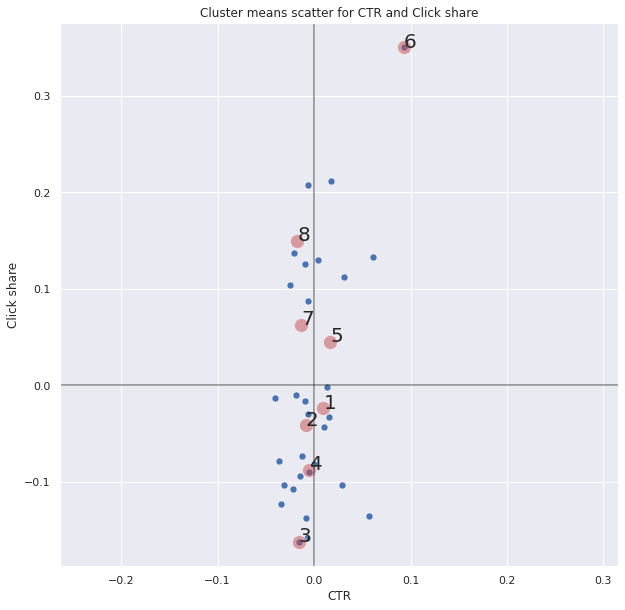

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'CTR'
y_var = 'Click share'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

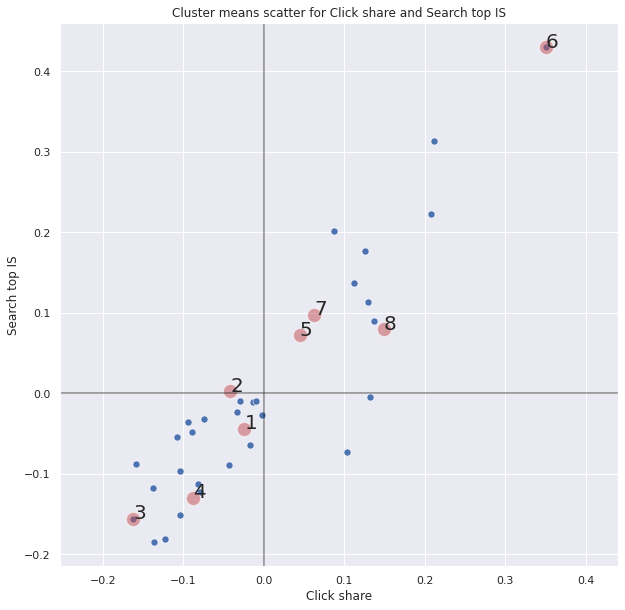

In [ ]:
# Another Pair: Click share & Search top IS
plt.figure(figsize=(10, 10))

# variable names
x_var = 'Click share'
y_var = 'Search top IS'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=200,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

In [ ]:
# add 1 to let the labels range from 1, ..., K instead of 0, ..., K - 1
a = kmeans.labels_ + 1
a = pd.Series(a)
a

0     7
1     8
2     6
3     2
4     5
5     2
6     5
7     8
8     1
9     7
10    1
11    4
12    2
13    1
14    2
15    1
16    1
17    2
18    1
19    2
20    7
21    5
22    4
23    2
24    3
25    4
26    8
27    4
28    4
29    4
dtype: int32

In [ ]:
a.value_counts().sort_index()

1    6
2    7
3    1
4    6
5    3
6    1
7    3
8    3
dtype: int64

In [ ]:
for k in range(kmeans.n_clusters):

    # first, create an indicator that selects the rows for a cluster
    indicator = (a == (k + 1))

    # select the rows, compute their mean, and compare against M
    assert np.allclose(M.loc[k + 1], X.loc[indicator].mean())

print('All good!')

All good!


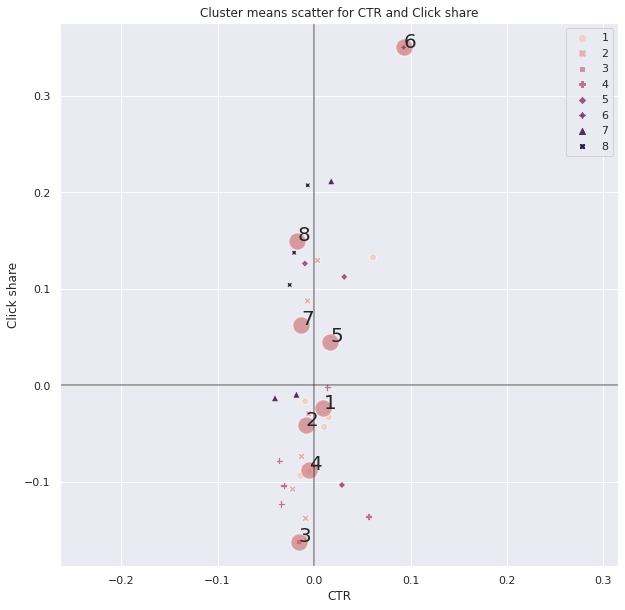

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'CTR'
y_var = 'Click share'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

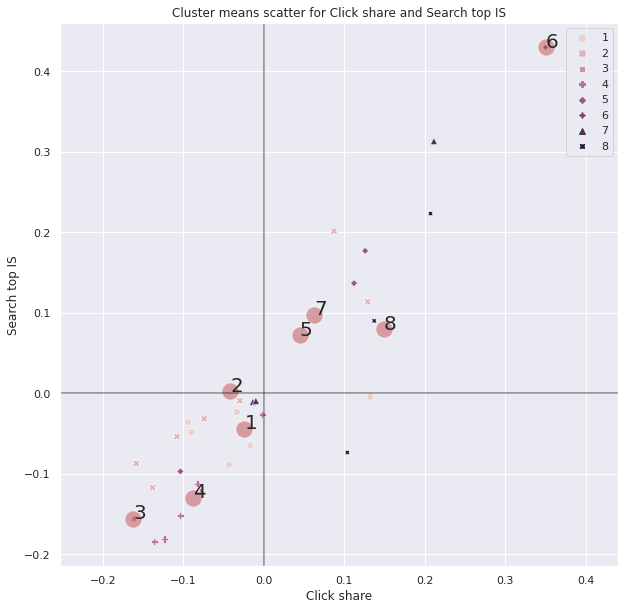

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'Click share'
y_var = 'Search top IS'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

In [ ]:
SSE = kmeans.inertia_
SSE

0.7953265149088518

In [ ]:
# Specify the number of different K values we are considering
n_k_values = 10

# Create a dictionary in which we will store the estimated K-means objects
kmeans_objects = {}

# Create a list in which we will store the SSE values for each K-means object
kmeans_sse = []

# Loop over the values 1, 2, ..., n_k_values
for k in range(1, n_k_values + 1):
    
    # do not forget to fix your random state!
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    # save the kmeans object in the dictionary
    kmeans_objects[k] = kmeans

    # save the SSE value of the kmeans object in the list
    kmeans_sse.append(kmeans.inertia_)
    
    print('Done with: k =', k)

Done with: k = 1
Done with: k = 2
Done with: k = 3
Done with: k = 4
Done with: k = 5
Done with: k = 6
Done with: k = 7
Done with: k = 8
Done with: k = 9
Done with: k = 10


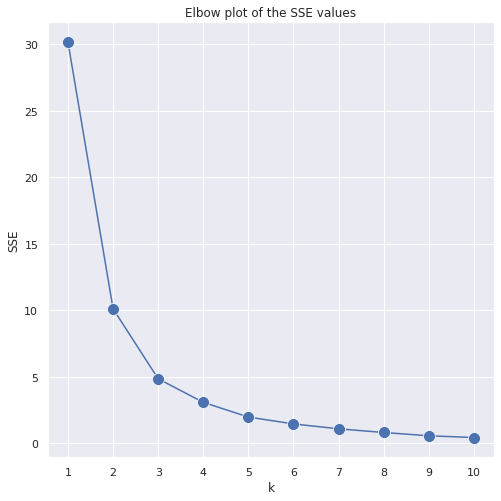

In [ ]:
plt.figure(figsize=(8, 8))

plt.title('Elbow plot of the SSE values')
plt.ylabel('SSE')
plt.xlabel('k')

sns.lineplot(
    x=range(1, n_k_values + 1),
    y=kmeans_sse,
    marker='o',
    markersize=12,
)

plt.xticks(range(1, n_k_values + 1))
plt.show()

In [ ]:
kmeans = kmeans_objects[3]

M = kmeans.cluster_centers_
M = pd.DataFrame(M, index=np.arange(kmeans.n_clusters) + 1)
M.round(2)

a = kmeans.labels_ + 1
a = pd.Series(a)
a

0     1
1     1
2     3
3     2
4     2
5     2
6     2
7     1
8     1
9     1
10    1
11    1
12    2
13    1
14    2
15    1
16    1
17    2
18    1
19    2
20    1
21    2
22    1
23    2
24    3
25    1
26    1
27    1
28    1
29    1
dtype: int32

In [ ]:
M = M.rename(columns={0: "CTR", 1: "Click share", 2: "Search top IS", 3: "Avg.cost"})

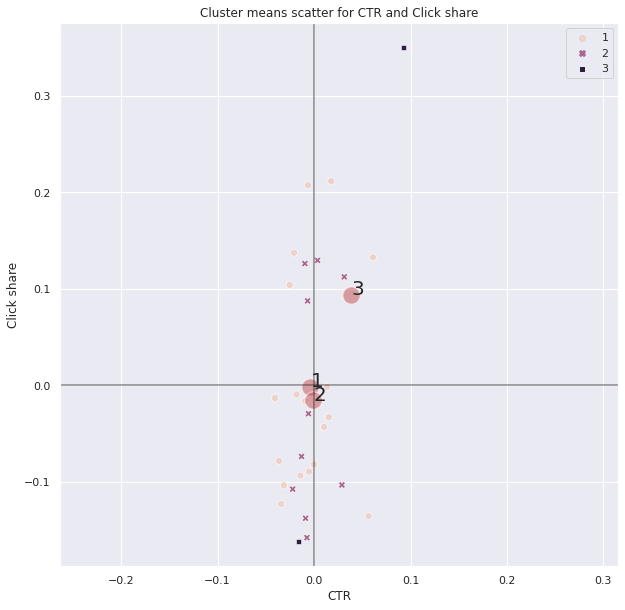

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'CTR'
y_var = 'Click share'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

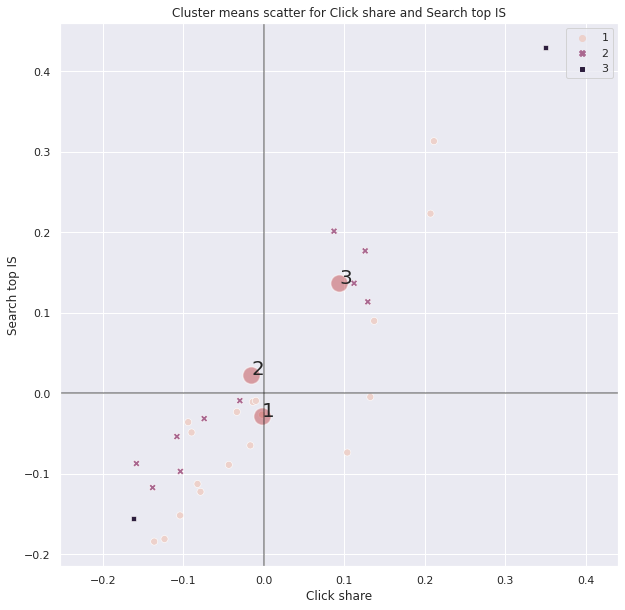

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'Click share'
y_var = 'Search top IS'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

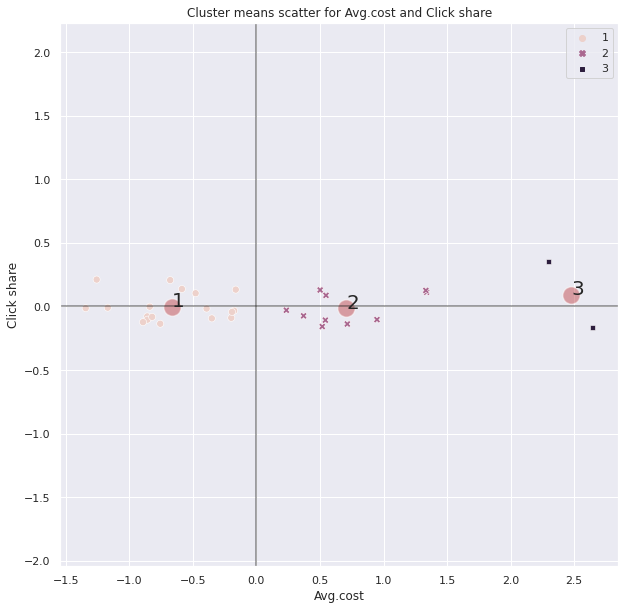

In [ ]:
plt.figure(figsize=(10, 10))

# variable names
x_var = 'Avg.cost'
y_var = 'Click share'
plt.title('Cluster means scatter for ' + x_var + ' and ' + y_var)


# create line for the axes
plt.axhline(0, alpha=0.5, color='k')
plt.axvline(0, alpha=0.5, color='k')


# scatterplot for the observations
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=X,
    s=50,
    hue=a,
    style=a,
    legend='full',
)


# scatterplot for the cluster means
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=M,
    s=300,
    color='r',
    alpha=0.5,
)


# add a label for each cluster mean
for k in range(kmeans.n_clusters):
    plt.annotate(
        s=k + 1,
        xy=M.loc[k + 1, [x_var, y_var]],
        fontsize=20
    )  

plt.axis('equal')
plt.show()

In [ ]:
CTR_vs_cost = X[((X["Avg.cost"] < 0) & (X["CTR"]>0))]
CTR_vs_cost

,CTR,Click share,Search top IS,Avg.cost
0,0.017767,0.211523,0.31341,-1.256442
8,0.061067,0.132523,-0.00439,-0.162264
10,0.015367,-0.033277,-0.02299,-0.175010
11,0.013567,-0.001977,-0.02639,-0.838772
18,0.010467,-0.043277,-0.08869,-0.191677
27,0.056567,-0.135977,-0.18409,-0.756414


In [ ]:
Click_vs_cost = X[((X["Avg.cost"] < 0) & (X["Click share"]>0))]
Click_vs_cost

,CTR,Click share,Search top IS,Avg.cost
0,0.017767,0.211523,0.31341,-1.256442
1,-0.006533,0.207323,0.22341,-0.677979
7,-0.020733,0.137323,0.09011,-0.585817
8,0.061067,0.132523,-0.00439,-0.162264
26,-0.025233,0.103923,-0.07339,-0.477968


In [ ]:
Searchtop_vs_cost = X[((X["Avg.cost"] < 0) & (X["Search top IS"]>0))]
Searchtop_vs_cost

,CTR,Click share,Search top IS,Avg.cost
0,0.017767,0.211523,0.31341,-1.256442
1,-0.006533,0.207323,0.22341,-0.677979
7,-0.020733,0.137323,0.09011,-0.585817
